In [88]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [89]:
import seaborn as sns
sns.set(style="darkgrid")

Loads

https://transparency.entsoe.eu/ Load -> Total Load Day-ahead/Actual -> Country -> UK -> Export Data -> Year, CSV

In [90]:
df=pd.read_csv('Total Load - Day Ahead _ Actual_201901010000-202001010000.csv')
df['ts']=pd.to_datetime([i[0] for i in df['Time (CET)'].str.split('-')],dayfirst=True)
df=df.set_index('ts',drop=False).sort_index()
load='Average UK Load in GW\n 01-01-2019 to 08-28-2019'
df[load]=df['Actual Total Load [MW] - United Kingdom (UK)'].replace('-',np.nan).astype(float)/1000
df[load]=df[load].rolling(3).mean()
df['day']=df['ts'].dt.weekday_name
time='Time of day'
df[time]=df['ts'].dt.time
df['Month']=df['ts'].dt.month
df['date']=df['ts'].dt.date.astype(str)

In [91]:
label='Day type'
labels=[]
for i in df[['date','day']].values:
    if i[1] in ['Saturday','Sunday']:
        d='Weekend'
    else:
        d='Weekday'
    if i[0] in ['2019-01-01','2019-04-19','2019-05-06','2019-05-27','2019-08-26']:
        d='Bank Holiday'
        #d=i[0]
    labels.append(d)
df[label]=labels

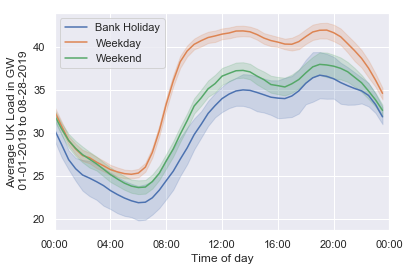

In [92]:
# Plot the responses for different events and regions
sns.lineplot(x=time, y=load,
             hue=label, 
             #style="day",
             data=df)
ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.xlim(0,24*60*60)
plt.xticks(range(0,24*60*60+1,4*60*60))
plt.savefig('1.png',bbox_inches='tight',dpi=300)

In [93]:
1-df.groupby('Day type').mean()[[load]].loc['Weekend']/df.groupby('Day type').mean()[[load]].loc['Weekday']

Average UK Load in GW\n 01-01-2019 to 08-28-2019    0.098656
dtype: float64

In [94]:
1-df.groupby('Day type').mean()[[load]].loc['Bank Holiday']/df.groupby('Day type').mean()[[load]].loc['Weekday']

Average UK Load in GW\n 01-01-2019 to 08-28-2019    0.15122
dtype: float64

In [101]:
label='Day type'
labels=[]
pretty={'2019-01-01':'Other','2019-04-19':'Other',
        '2019-05-06':'Early May BH 05-06','2019-05-27':'Spring BH 05-27','2019-08-26':'Summer BH 08-26',
       '1e':'January Weekday','5e':'May Weekday','7e':'July Weekday',
        '1k':'January Weekend','5k':'May Weekend','7k':'July Weekend'}
for i in df[['date','day','Month']].values:
    if i[1] in ['Saturday','Sunday']:
        if i[2] in [1,5]:
            d=pretty[str(i[2])+'k']
        else:
            d='Other'
    else:
        if i[2] in [1,5]:
            #d=pretty[str(i[2])+'e']
            d='Other'
        else:
            d='Other'
    if i[0] in ['2019-01-01','2019-04-19','2019-05-06','2019-05-27','2019-08-26']:
        d=pretty[i[0]]
        #d=i[0]
    labels.append(d)
df[label]=labels

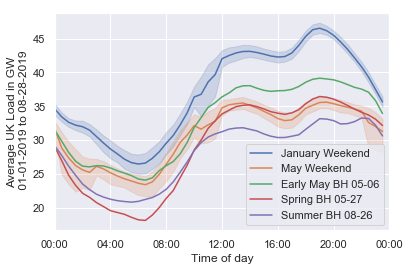

In [102]:
# Plot the responses for different events and regions
sns.lineplot(x=time, y=load,
             hue=label, 
             #style="day",
             data=df[df[label]!='Other'])
ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.xlim(0,24*60*60)
plt.xticks(range(0,24*60*60+1,4*60*60))
plt.savefig('2.png',bbox_inches='tight',dpi=300)

In [60]:
label='Day type'
style=' '
labels=[]
styles=[]
pretty={1:'January',7:'July'}
for i in df[['date','day','Month']].values:
    if i[1] in ['Saturday','Sunday']:
        d='Weekend'
    else:
        d='Weekday'
    if i[2] in [1,7]:
        s=pretty[i[2]]
    else:
        s='Other'
    labels.append(d)
    styles.append(s)
df[label]=labels
df[style]=styles

In [61]:
dz=df[df['Month']==7].groupby('Day type').mean()[[load]]

Prices

https://transparency.entsoe.eu/ Transmission -> Day-ahead Prices -> Bidding Zone -> UK (BZN|GB) -> UTC -> Export Data -> Year, CSV

In [62]:
rf=pd.read_csv('Day-ahead Prices_201901010000-202001010000.csv')
rf['ts']=pd.to_datetime([i[0] for i in rf['MTU (UTC)'].str.split('-')],dayfirst=True)
rf=rf.set_index('ts',drop=False).sort_index()
price='Average UK Day-ahead Price in £/MWh\n 01-01-2019 to 08-28-2019'
rf[price]=rf['Day-ahead Price [GBP/MWh]'].replace('-',np.nan).astype(float)
rf[price]=rf[price].rolling(3).mean()
rf['day']=rf['ts'].dt.weekday_name
rf[time]=rf['ts'].dt.time
rf['Month']=rf['ts'].dt.month
rf['date']=rf['ts'].dt.date.astype(str)

In [63]:
label='Day type'
style=' '
labels=[]
styles=[]
pretty={1:'January',7:'July'}
for i in rf[['date','day','Month']].values:
    if i[1] in ['Saturday','Sunday']:
        d='Weekend'
    else:
        d='Weekday'
    if i[2] in [1,7]:
        s=pretty[i[2]]
    else:
        s='Other'
    labels.append(d)
    styles.append(s)
rf[label]=labels
rf[style]=styles

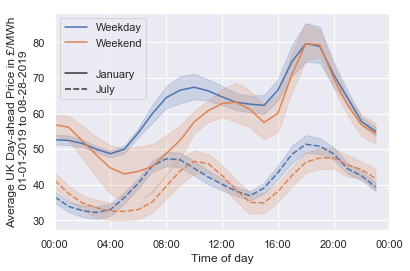

In [64]:
# Plot the responses for different events and regions
sns.lineplot(x=time, y=price,
             hue=label, 
             style=style,
             data=rf[rf[style]!='Other'])
ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.xlim(0,24*60*60)
plt.xticks(range(0,24*60*60+1,4*60*60))
plt.savefig('3.png',bbox_inches='tight',dpi=300)

In [65]:
rz=rf[rf['Month']==1].groupby('Day type').mean()[[price]]
1-rz.loc['Weekend']/rz.loc['Weekday']

Average UK Day-ahead Price in £/MWh\n 01-01-2019 to 08-28-2019    0.066048
dtype: float64

In [66]:
rz=rf[rf['Month']==7].groupby('Day type').mean()[[price]]
1-rz.loc['Weekend']/rz.loc['Weekday']

Average UK Day-ahead Price in £/MWh\n 01-01-2019 to 08-28-2019    0.034258
dtype: float64

Carbon

https://carbonintensity.org.uk/ - Download the Data

In [67]:
fs=['Carbon_Intensity_Data.csv','Carbon_Intensity_Data (1).csv','Carbon_Intensity_Data (2).csv',
   'Carbon_Intensity_Data (3).csv','Carbon_Intensity_Data (4).csv','Carbon_Intensity_Data (5).csv',
   'Carbon_Intensity_Data (6).csv','Carbon_Intensity_Data (7).csv']
wfs=[]
for f in fs:
    wfs.append(pd.read_csv(f))
wf=pd.concat(wfs)
wf['ts']=pd.to_datetime(wf['Datetime (UTC)'])
wf=wf.set_index('ts',drop=False).sort_index()
carbon='UK Electricity Carbon Intensity in gCO2/kWh\n 01-01-2019 to 08-28-2019'
wf[carbon]=wf['Actual Carbon Intensity (gCO2/kWh)'].astype(float)
wf[price]=wf[carbon].rolling(3).mean()
wf['day']=wf['ts'].dt.weekday_name
wf[time]=wf['ts'].dt.time
wf['Month']=wf['ts'].dt.month
wf['date']=wf['ts'].dt.date.astype(str)

In [68]:
label='Day type'
style=' '
labels=[]
styles=[]
pretty={1:'January',7:'July'}
for i in wf[['date','day','Month']].values:
    if i[1] in ['Saturday','Sunday']:
        d='Weekend'
    else:
        d='Weekday'
    if i[2] in [1,7]:
        s=pretty[i[2]]
    else:
        s='Other'
    labels.append(d)
    styles.append(s)
wf[label]=labels
wf[style]=styles

In [69]:
wz=wf.groupby('Day type').mean()[[carbon]]

In [70]:
1-wz.loc['Weekend']/wz.loc['Weekday']

UK Electricity Carbon Intensity in gCO2/kWh\n 01-01-2019 to 08-28-2019    0.154757
dtype: float64

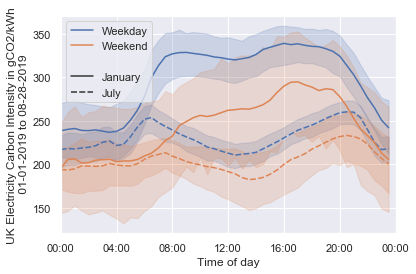

In [71]:
# Plot the responses for different events and regions
sns.lineplot(x=time, y=carbon,
             hue=label, 
             style=style,
             data=wf[wf[style]!='Other'])
ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.xlim(0,24*60*60)
plt.xticks(range(0,24*60*60+1,4*60*60))
plt.savefig('4.png',bbox_inches='tight',dpi=300)

In [72]:
wz=wf[wf['Month']==1].groupby('Day type').mean()[[carbon]]
1-wz.loc['Weekend']/wz.loc['Weekday']

UK Electricity Carbon Intensity in gCO2/kWh\n 01-01-2019 to 08-28-2019    0.18281
dtype: float64

In [73]:
wz=wf[wf['Month']==7].groupby('Day type').mean()[[carbon]]
1-wz.loc['Weekend']/wz.loc['Weekday']

UK Electricity Carbon Intensity in gCO2/kWh\n 01-01-2019 to 08-28-2019    0.116714
dtype: float64

Emissions

In [74]:
emi='Carbon Emissions Rate of\nUK Electricity in ktCO2/h\n 01-01-2019 to 08-28-2019'
df[emi]=df[load]
l=df[[time,emi,'Day type','Month']]
wf[emi]=wf[carbon]
w=wf[[time,emi,'Day type','Month']]
w.index=w.index.tz_convert("UTC")
l.index=l.index.tz_localize('UTC')
w=w.set_index([time,'Day type','Month'])
l=l.set_index([time,'Day type','Month'])
q=(w*l*2/1000).reset_index() #/2 for half-hours /1000 for units
q=q[((q['Month']==1)|(q['Month']==7))]
q[style]=q['Month'].replace(1,'January').replace(7,'July')

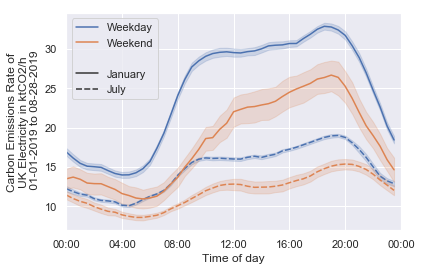

In [75]:
# Plot the responses for different events and regions
sns.lineplot(x=time, y=emi,
             hue=label, 
             style=style,
             data=q.dropna())
ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.xlim(0,24*60*60)
plt.xticks(range(0,24*60*60+1,4*60*60))
plt.savefig('5.png',bbox_inches='tight',dpi=300)

In [76]:
qz=q.groupby(['Day type']).mean()[[emi]]

In [77]:
1-qz.loc['Weekend']/qz.loc['Weekday']

Carbon Emissions Rate of\nUK Electricity in ktCO2/h\n 01-01-2019 to 08-28-2019    0.242381
dtype: float64

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/789811/Final_greenhouse_gas_emissions_tables_2017.xlsx

UK emissions 2017: 112.6 MtCO2e

In [78]:
#daily
112.6/365*1000 #kt

308.4931506849315

In [79]:
qz=(q.groupby([style,label,time]).mean()[[emi]]/2).reset_index().groupby([label,style]).sum()

In [80]:
1-qz.loc['Weekend']/qz.loc['Weekday']

,Carbon Emissions Rate of UK Electricity in ktCO2/h 01-01-2019 to 08-28-2019
,
January,0.249492
July,0.189289


In [81]:
qz.loc['Weekend']-qz.loc['Weekday']

,Carbon Emissions Rate of UK Electricity in ktCO2/h 01-01-2019 to 08-28-2019
,
January,-146.860022
July,-66.878373


https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle

In [82]:
110*52*1000/4.6 #cars removed

1243478.2608695654

Stacked

https://transparency.entsoe.eu/ Generation -> Actual Generation per Production Type -> Country -> UK -> Export Data -> Year, CSV

In [83]:
sources={'Biomass  - Actual Aggregated [MW]':'Other',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]':'Coal',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]':'Coal',
       'Fossil Gas  - Actual Aggregated [MW]':'Natural Gas',
       'Fossil Hard coal  - Actual Aggregated [MW]':'Coal',
       'Fossil Oil  - Actual Aggregated [MW]':'Other',
       'Fossil Oil shale  - Actual Aggregated [MW]':'Other',
       'Fossil Peat  - Actual Aggregated [MW]':'Coal',
       'Geothermal  - Actual Aggregated [MW]':'Other',
       'Hydro Pumped Storage  - Actual Aggregated [MW]':'Other',
       'Hydro Pumped Storage  - Actual Consumption [MW]':'Other',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]':'Other',
       'Hydro Water Reservoir  - Actual Aggregated [MW]':'Other',
       'Marine  - Actual Aggregated [MW]':'Other', 
       'Nuclear  - Actual Aggregated [MW]':'Nuclear',
       'Other  - Actual Aggregated [MW]':'Other',
       'Other renewable  - Actual Aggregated [MW]':'Other',
       'Solar  - Actual Aggregated [MW]':'Solar', 
       'Waste  - Actual Aggregated [MW]':'Other',
       'Wind Offshore  - Actual Aggregated [MW]':'Wind',
       'Wind Onshore  - Actual Aggregated [MW]':'Wind'}
src=list(set(sources.values()))

In [84]:
pf=pd.read_csv('Actual Generation per Production Type_201901010000-202001010000.csv')
pf['ts']=pd.to_datetime([i[0] for i in pf['MTU'].str.split('-')],dayfirst=True)
pf=pf.set_index('ts').sort_index()
pf=pf[sources.keys()].fillna(0)
for p in src:
    pf[p]=0
for p in set(sources.keys()):
    pf[sources[p]]=pf[sources[p]]+pf[p].replace('n/e',0).replace('-',0).astype(float)
pf=pf[src]
pf=pf.rolling(3).mean()
pf['ts']=pf.index
pf['day']=pf['ts'].dt.weekday_name
pf[time]=pf['ts'].dt.time
pf['Month']=pf['ts'].dt.month
pf['date']=pf['ts'].dt.date.astype(str)

In [85]:
label='Day type'
style=' '
labels=[]
styles=[]
pretty={1:'January',7:'July'}
for i in pf[['date','day','Month']].values:
    if i[1] in ['Saturday','Sunday']:
        d='Weekend'
    else:
        d='Weekday'
    if i[2] in [1,7]:
        s=pretty[i[2]]
    else:
        s='Other'
    labels.append(d)
    styles.append(s)
pf[label]=labels
pf[style]=styles

In [86]:
src2=['Nuclear','Wind','Solar','Natural Gas','Coal','Other']
clr2=['#1d91c0','#a6d96a','#fdae61','#dd3497','#ae017e','#5e4fa2']
fuels=[u'hydro',u'nuclear',u'biofuels',u'other',u'biomass',u'coal',u'oil',u'gas',u'geoth.',u'wind',u'PV',u'CSP']
fuelcolors=['#41b6c4','#1d91c0','#225ea8','#253494','#5e4fa2','#7a0177','#ae017e','#dd3497','#a6d96a','#d9ef8b','#fee08b','#fdae61']

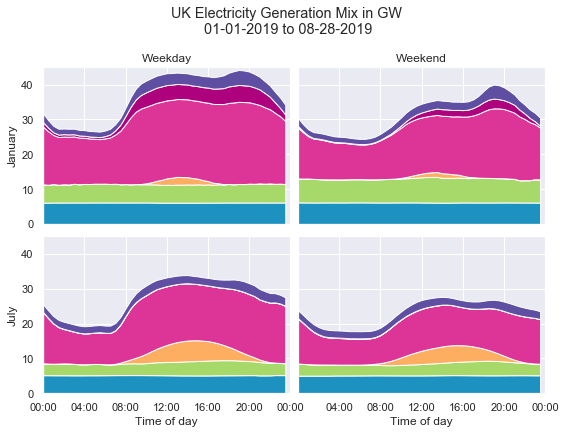

In [87]:
stack='UK Electricity Generation Mix in GW\n 01-01-2019 to 08-28-2019'
fig,axes=plt.subplots(2,2,figsize=(9,6))
plt.subplots_adjust(wspace=0.03,hspace=0.08)
m=['January','July']
w=['Weekday','Weekend']
for i in range(len(m)):
    for j in range(len(w)):
        pz=(pf[((pf[style]==m[i])&(pf[label]==w[j]))].groupby(time).mean()[src2]/1000).astype(float).dropna(how='all',axis=1)
        ax=axes[i][j]
        ax.stackplot(pz.index,pz.T.values, labels=pz.columns,colors=clr2)
        if j==0:
            ax.set_ylabel(m[i])
            ax.set_xticks([i for i in range(0,24*60*60+1,4*60*60)][:])
        else:
            ax.set_yticklabels([])
            ax.set_xticks([i for i in range(0,24*60*60+1,4*60*60)][1:])
        #if i==0 and j==0:
        #    handles, labels = ax.get_legend_handles_labels()
        #    ax.legend(handles=handles[::-1], labels=labels[::-1],loc='upper left')     
        ax.set_xlim(0,24*60*60)
        ax.set_ylim(0,45)
        if i==1:
            ax.set_xlabel(time)
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([])
            ax.set_title(w[j])
fig.suptitle(stack,y=1.02)              
fig.savefig('c.png',bbox_inches='tight',dpi=300)